## Data de entrega: 16/03/22
<span style='font-family:Lato,sans-serif;'>author: <span style='color:#1696d2'>[@baiochi](https://github.com/baiochi/)</span>  
<span style='font-family:Lato,sans-serif;'>Email: <span style='color:#1696d2'>andre.juan.prof@gmail.com
_________

# Projeto módulos ML - Descrição

____________

## Contextualização

A PyCoders Ltda., cada vez mais especializada no mundo da Inteligência Artificial e Ciência de Dados, foi procurada por uma fintech para desenvolver um projeto de concessão de crédito para imóveis. Nesse projeto, espera-se a criação de valor que **discrimine ao máximo** os **bons pagadores** dos **maus pagadores**. 

Para isso, foi disponibilizada uma base de dados com milhares de casos de **empréstimos do passado** com diversas características dos clientes. 

Entrega: um modelo com a **melhor performance** possível.

Métrica de performance (inicialmente proposta): **ROC-AUC.**


## Base de Dados

Serão utilizadas bases de dados com **informações cadastrais, histórico de crédito e balanços financeiros de diversos clientes**. 

O conjunto de dados está dividido em **treino e teste**, todos no formato csv. 

Toda a modelagem, validação e avaliação deve ser feita em cima do conjunto de **treino**, subdividindo tal base como a squad achar melhor. 

Existe também os das variáveis explicativas, para ajudar no desenvolvimento do projeto. 

Serão necessários diversos cruzamentos e vocês estão livres para usar os dados da maneira que acharem mais conveniente.

[Clique aqui](https://drive.google.com/file/d/17fyteuN2MdGdbP5_Xq_sySN_yH91vTup/view) pra baixar os dados (eles estão disponiveis no arquivo zipado `credito-imoveis.zip`).

## Regras de Entrega

Deve ser entregue um arquivo csv com as **predições** para a base de teste.

Essa base deverá ser um Data Frame com duas colunas: a primeira sendo o **SK_ID_CURR** e a segunda a **probabilidade de inadimplência.**

### IMPORTANTE!

Entregar as predições com a **probabilidade da inadimplência ocorrer**, não a classe predita.

Além do arquivo com as predições, claro, entreugem também o notebook com o código utilizado. É importante que ele tenha:

- (i) a análise exploratória e construção das variáveis explicativas;

- (ii) a análise de modelagem, mostrando o processo das avaliações dos modelos e os motivos das decisões tomadas sobre qual modelo usar.

## Dicas


Explorar o conceito das variáveis: existe risco de imagem uma empresa utilizar variável de sexo para determinar risco de crédito? Vale a pena trazer a variável para o modelo?

Criar novas variáveis usando as variáveis que já estão na base: criatividade!

Qualquer dúvida, só me chamar! ;)


## Observações adicionais

- No arquivo zipado, há todas as bases que foram utilizadas na criação das bases principais (`application_{train|test_student}`). Vocês podem explorar à vontade estas outras bases pra entender como elas se comunicam entre si, e como as informações delas foram agregadas na base principal. No entanto, **não é necessário utilizar estas informações**, basta usar apenas o que tem na base de treino `application_train`. Este trabalho de cruzamento de diversas bases para a construção de uma única base de treinamento é muito importante, mas (embora já saibamos como cruzar bases!), é algo que foge do escopo deste módulo -- no módulo de banco de dados, vcs vão aprender tudo sobre isso! ;)

- Reflitam sobre isso: da forma que está, a base de teste `application_test_student` serve pra quê?

- Reforçando, pq nunca é demais: não esqueçam de fazer uma extensa análise exploratória! **Conheçam o problema com o qual vcs estão trabalhando!** Essa é a hora de botar em prática ao extremo tudo o que vimos no módulo 3 e 4! (e o que vimos no módulo 5 na etapa de modelagem, claro hehe)


## Alguns benchmarks

Pra ter uma ideia da performance máxima esperada do modelo, sugiro dar uma olhada nos [notebooks da competição](https://www.kaggle.com/c/home-credit-default-risk/code?competitionId=9120&sortBy=voteCount) (usem apenas como referência/inspiração! Peço que, na solução de vocês, realmente vcs apliquem as coisas como vimos no curso!!)

Em alguns notebooks, podemos ver que as AUC/ROCs máximas de validação encontradas foram de **0.76** e até mesmo **0.78** (usando modelos de gradient boosting e um pouco de feature engineering). Acredito que esse pode ser o alvo teto pra performance de vocês -- embora, como sempre dizemos: tentem chegar o mais próximo possível, no tempo que vocês têm disponível! Então, se não chegarem exatamente nessa performance, tudo bem! O importante é tentar chegar o mais próximo possível ;)

# Home Credit Default Risk Analysis

## Table of Contents

1. [Libraries and Functions imports](#imports)
2. [Exploratory Data Analysis](#eda)
	- [Reading data](#read)
	- [Visualizing null values](#na)
	- [Features types](#dtypes)
	- [Encoding categorical variables](#encoding)
	- [Data correlation](#corr)
	- [Target distribuition](#target_dist)
	- [Search for Outliers](#outliers)
3. [First Cycle - Baseline Model](#baseline)
4. [Second Cycle - Improving Model with Hyper-parameter tunning](#cycle2)
5. [Third Cycle - Using other estimators](#cycle3)
	- [Random Forest](#rf)
	- [Gradient Boosting](#gb)
	- [XGBoost](#xgb)
	- [XGBoost (Optmized)](#xgb+)
6. [Interpreting Results](#results)
7. [Deploy Model](#deploy)
8. [Submit results](#sub)

## <span id='imports' style='color:Gold'>1. Libraries and Functions

In [1]:
# Libraries, functions and custom configurations
from config.custom import *
# Load CSS for custom Markdown
HTML(open('./config/custom.css', 'r').read())

Numpy: 1.20.3
Pandas: 1.3.4
Sklearn: 1.0.2
Matplotlib: 3.4.3
Seaborn: 0.11.2


## <span id='eda' style='color:Gold'>2. Exploratory Data Analysis

Exploratory data analysis will cover to following workflow:
- Read the files, both test and train data, check their sizes and number of features  
- Visualize the null values ​​and calculate how much they represent in relation to the total data  
- Check each column types, for numeric discrete/continuous or object categorical variables  
- Encode categorical variables for later processing 
- Examine target variable distribuition  
- Visualize data correlation to find insights  
- Treat possible outliers or inconsistent values in features  
- Select candidate for future feature engineering  

### <span id='read' style='color:#1696d2'>Reading data</span>

The following file `HomeCredit_columns_description.csv` contains detailed information about each column.  
  
*Obs: if any endocing error occurs when reading with pd.read_csv, just open the file in any editor, save, close and try again.*

In [3]:
df_description = pd.read_csv('data/HomeCredit_columns_description.csv')
df_description.drop('Unnamed: 0', axis=1, inplace=True)
df_description

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...
214,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [4]:
df_train = pd.read_csv('data/application_train.csv')
print(f'Train dataset info\nObservations: {df_train.shape[0]}\nFeatures: {df_train.shape[1]}')
df_train.head()

Train dataset info
Observations: 246008
Features: 122


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.000,700830.000,22738.500,585000.000,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,0.020,-8676,-813,-4163.000,-1363,NaN,1,1,1,1,0,0,Core staff,1.000,2,2,FRIDAY,17,0,0,0,1,1,0,Trade: type 2,NaN,0.699,0.171,0.062,0.030,0.976,0.674,0.005,0.000,...,0.062,0.030,0.976,0.678,0.005,0.000,0.103,0.167,0.042,0.000,0.051,0.052,0.000,0.000,reg oper account,block of flats,0.040,Block,No,0.000,0.000,0.000,0.000,-589.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,134978,0,Cash loans,F,N,N,0,90000.000,375322.500,14422.500,324000.000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025,-13583,-223,-3554.000,-3287,NaN,1,1,0,1,0,0,High skill tech staff,2.000,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.541,0.200,0.769,0.023,0.057,0.981,0.735,0.016,0.000,...,0.023,0.057,0.981,0.738,0.016,0.000,0.103,0.042,0.083,0.013,0.019,0.019,0.000,0.000,reg oper account,block of flats,0.016,Block,No,0.000,0.000,0.000,0.000,-1409.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,1.000,0.000,3.000
2,318952,0,Cash loans,M,Y,N,0,180000.000,544491.000,16047.000,454500.000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.036,-13993,-6202,-7971.000,-4175,9.000,1,1,1,1,0,0,Managers,2.000,2,2,THURSDAY,15,0,0,0,0,0,0,Business Entity Type 1,NaN,0.705,0.626,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,1.000,-675.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,1.000,1.000,3.000
3,361264,0,Cash loans,F,N,Y,0,270000.000,814041.000,28971.000,679500.000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.046,-22425,365243,-11805.000,-1732,NaN,1,0,0,1,1,0,NaN,2.000,1,1,TUESDAY,9,0,0,0,0,0,0,XNA,NaN,0.725,0.811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,NaN,No,2.000,0.000,2.000,0.000,-1588.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,1.000,4.000
4,260639,0,Cash loans,F,N,Y,0,144000.000,675000.000,21906.00

In [5]:
df_test = pd.read_csv('data/application_test_student.csv')
print(f'Test dataset info\nObservations: {df_test.shape[0]}\nFeatures: {df_test.shape[1]}')
df_test.head()

Test dataset info
Observations: 61503
Features: 121


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.000,417024.000,20191.500,360000.000,"Spouse, partner",Working,Incomplete higher,Married,House / apartment,0.020,-21774,-2125,-4611.000,-4653,NaN,1,1,1,1,1,0,Security staff,2.000,3,3,FRIDAY,13,0,0,0,0,0,0,Medicine,0.485,0.183,0.146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.000,1.000,0.000,-2008.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,3.000
1,363290,Cash loans,M,N,Y,0,450000.000,640080.000,31261.500,450000.000,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046,-18499,-2055,-3052.000,-2028,NaN,1,1,0,1,0,0,Laborers,2.000,1,1,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.625,0.669,0.680,0.376,0.448,0.995,NaN,NaN,0.480,0.207,...,0.380,0.448,0.995,NaN,NaN,0.480,0.207,0.625,NaN,0.035,NaN,0.467,NaN,0.005,NaN,block of flats,0.452,Panel,No,0.000,0.000,0.000,0.000,-728.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
2,436006,Revolving loans,M,Y,Y,0,450000.000,900000.000,45000.000,900000.000,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.011,-18084,-4159,-8525.000,-1616,4.000,1,1,0,1,0,0,Managers,1.000,2,2,SUNDAY,14,0,0,0,0,0,0,Construction,NaN,0.454,0.174,0.111,0.085,0.984,0.776,0.019,0.120,0.103,...,0.112,0.085,0.984,0.779,0.019,0.120,0.103,0.333,0.375,0.095,0.092,0.115,0.008,0.005,reg oper spec account,block of flats,0.100,Panel,No,NaN,NaN,NaN,NaN,-1273.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,2.000,0.000
3,377703,Cash loans,M,Y,N,1,360000.000,1125000.000,33025.500,1125000.000,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019,-12319,-2532,-12304.000,-4215,6.000,1,1,1,1,0,0,NaN,3.000,2,2,THURSDAY,15,0,1,1,0,1,1,Business Entity Type 3,NaN,0.688,0.440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.000,-984.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
4,188624,Cash loans,M,Y,Y,0,675000.000,835380.000,42840.000,675000.000,Un

In [5]:
# Verify possible common observations in train/test dataset
pd.concat([df_train['SK_ID_CURR'], df_test['SK_ID_CURR']]).nunique() == df_train.shape[0] + df_test.shape[0]

True

Training dataset contains a higher amount of observations *(246008 x 61503)* and the `TARGET` feature, which will be used for prediction. Also both datasets have unique observations.  

### <span id='na' style='color:#1696d2'>Visualizing null values

In [6]:
# select only features when TARGET = 0 with NA > 0
df_train_t0_null = df_train.query('TARGET == 0').isnull().sum()
df_train_t0_null = df_train_t0_null[df_train_t0_null > 0]
df_train_t0_null.sort_values(inplace=True)
# select only features when TARGET = 1 with NA > 0
df_train_t1_null = df_train.query('TARGET == 1').isnull().sum()
df_train_t1_null = df_train_t1_null[df_train_t1_null > 0]
df_train_t1_null.sort_values(inplace=True)
# display results side by side with percentage
pd.concat([
			pd.DataFrame({
				'NA_values' : df_train_t0_null,
				'Percent' : df_train_t0_null.apply(lambda x: f'{x / df_train.shape[0] * 100:.2f} %'),
			}),
			pd.DataFrame({
				'NA_values' : df_train_t1_null,
				'Percent' : df_train_t1_null.apply(lambda x: f'{x / df_train.shape[0] * 100:.2f} %'),
			})
		], axis=1)

,NA_values,Percent,NA_values,Percent
CNT_FAM_MEMBERS,1,0.00 %,NaN,NaN
DAYS_LAST_PHONE_CHANGE,1,0.00 %,NaN,NaN
AMT_ANNUITY,10,0.00 %,NaN,NaN
AMT_GOODS_PRICE,209,0.08 %,17.000,0.01 %
EXT_SOURCE_2,499,0.20 %,45.000,0.02 %
...,...,...,...,...
NONLIVINGAPARTMENTS_MODE,156165,63.48 %,14749.000,6.00 %
NONLIVINGAPARTMENTS_AVG,156165,63.48 %,14749.000,6.00 %
COMMONAREA_MODE,157153,63.88 %,14825.000,6.03 %
COMMONAREA_AVG,157153,63.88 %,14825.000,6.03 %


In [7]:
fig = go.Figure()
# add values from TARGET = 0
fig.add_trace(go.Bar(
    y=df_train_t0_null.index,
    x=df_train_t0_null,
    name='TARGET = 0',
    orientation='h',
    marker=dict(
        color='rgba(22, 150, 210, 0.6)',
        line=dict(color='rgba(22, 150, 210, 1)', width=3)
    )
))
# add values from TARGET = 1
fig.add_trace(go.Bar(
    y=df_train_t1_null.index,
    x=df_train_t1_null,
    name='TARGET = 1',
    orientation='h',
    marker=dict(
        color='rgba(92, 88, 89, 0.6)',
        line=dict(color='rgba(92, 88, 89, 1)', width=3)
    )
))
# configure layout
fig.update_layout(barmode='stack', height=1600, title='Number of null values for each Feature')
fig.show()

In [8]:
print(f'Percentage of null values in the entire dataset: {df_train.isna().sum().sum() / df_train.size * 100 :.2f} %')

Percentage of null values in the entire dataset: 24.41 %


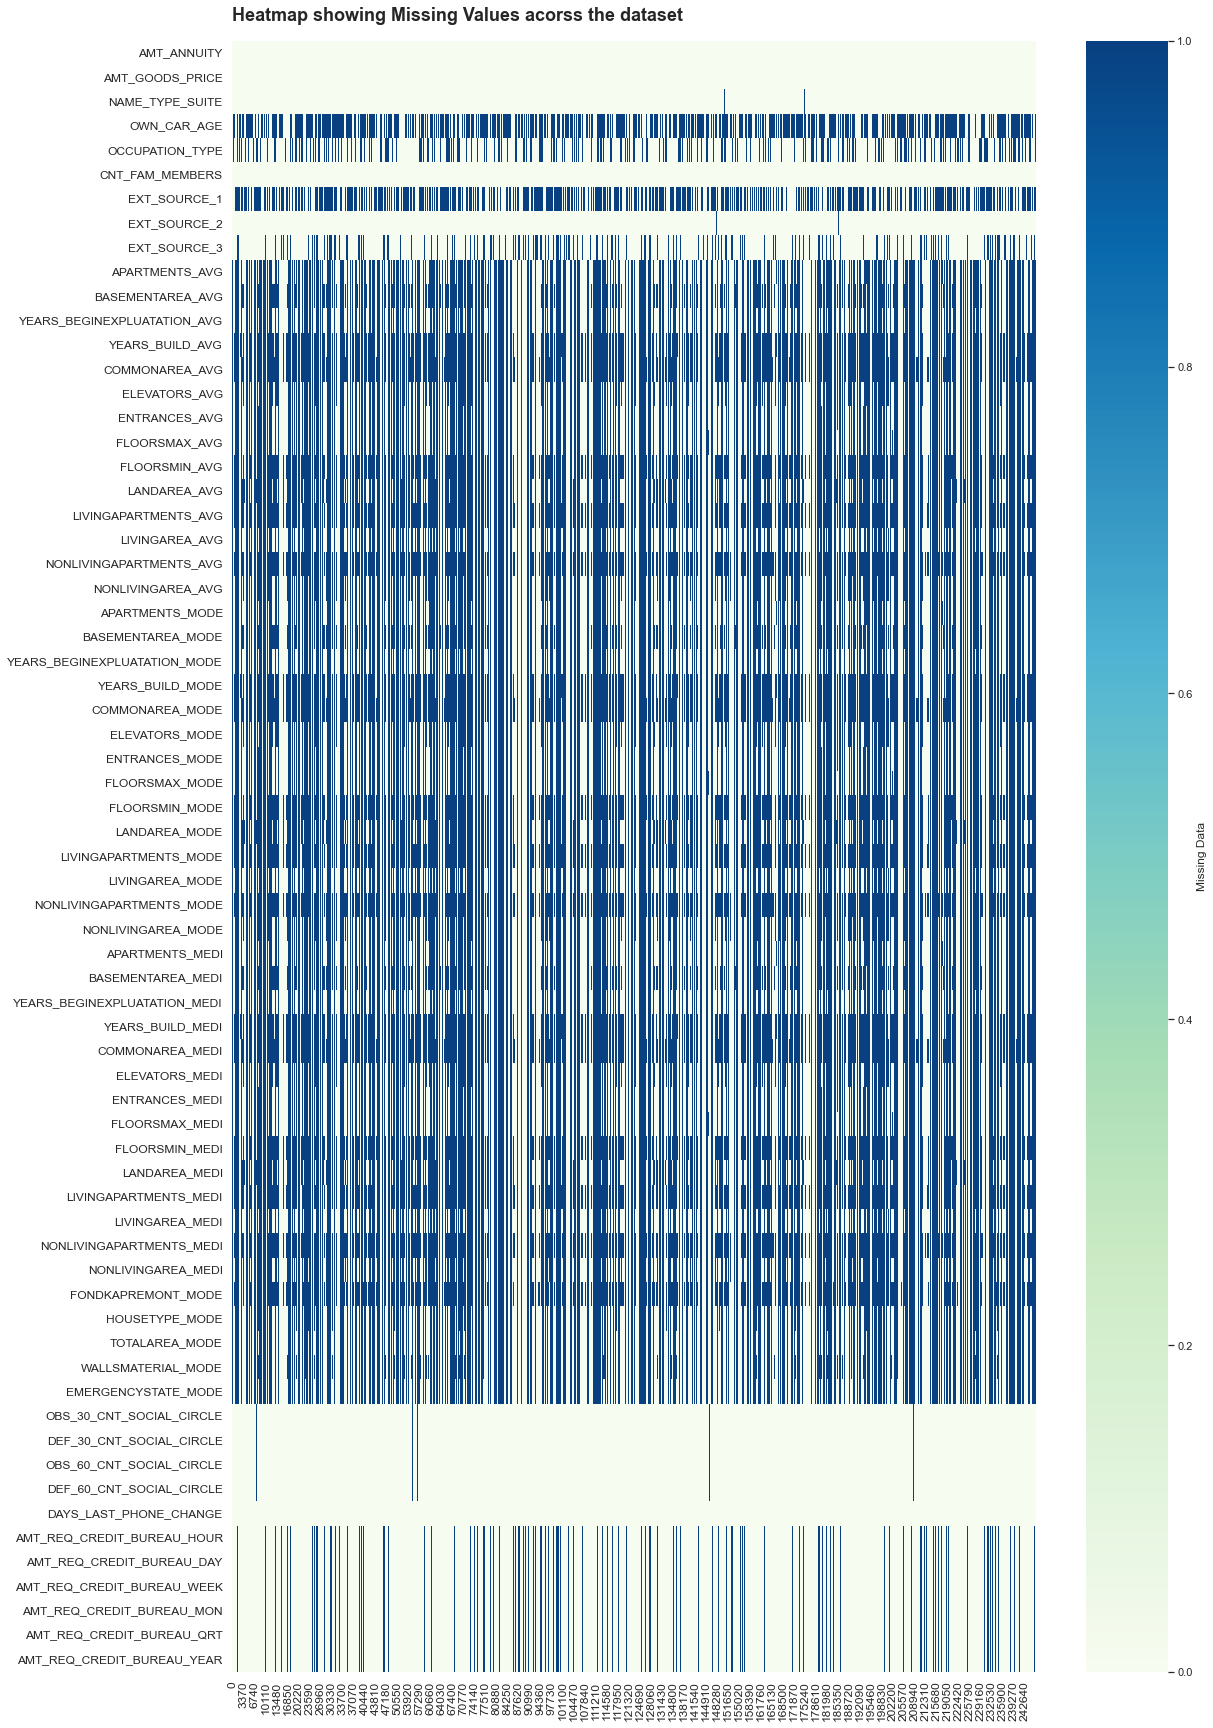

In [9]:
# heatmap showing null values
plt.figure(figsize=(18,30))
sns.heatmap(df_train.loc[:, df_train.isna().any()].isna().transpose(),
			cmap="GnBu",
			cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values acorss the dataset', weight='bold', fontsize=18, pad=20, loc='left')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show();

In [10]:
print(f'Data loss if removing all null values: {abs((df_train.dropna().size / df_train.size) - 1 * 100):.2f} %')

Data loss if removing all null values: 99.97 %


**Conclusion** 
   
Since a considerable amount of null values is dispersed across many observations and features, no column will be removed since we can't predict those impacts on the model. These values will be adressed later with [**Sklearn Impute**](#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) module.  

### <span id='dtypes' style='color:#1696d2'>Features types

Number of features by `dtype`

In [11]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Visualizing features with type = `float64`

Numeric discrete variables: 65


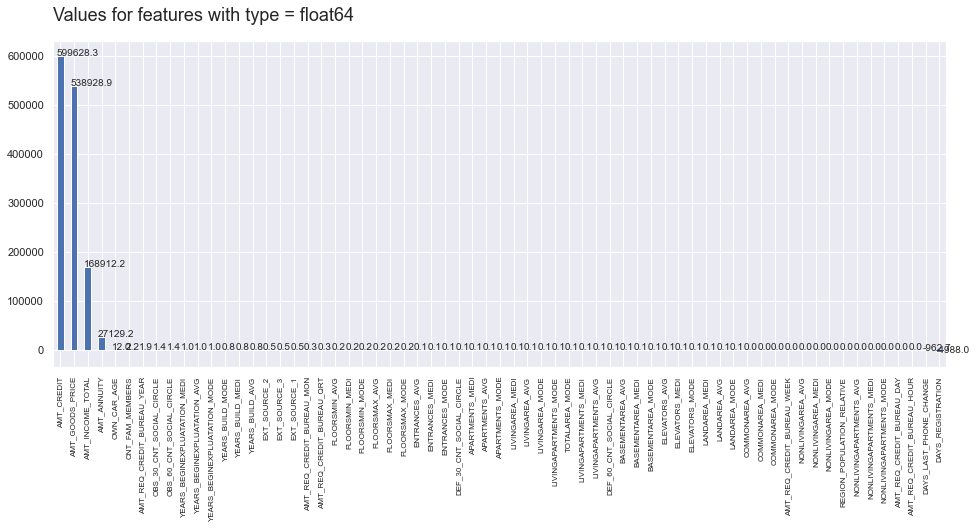

In [12]:
plt.figure(figsize=(16,6))
plot_data = df_train.select_dtypes(include='float64').mean().sort_values(ascending=False)
plot_data.plot(kind='bar')
plt.title('Values for features with type = float64', loc='left', size=18, pad=20)
# get xticks to write values on top of each bar
xlocs, xlabs = plt.xticks()
for i, v in enumerate(plot_data.round(1)):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v), size=10)
plt.xticks(xlocs, xlabs, size=8);
print(f'Numeric discrete variables: {df_train.select_dtypes(include="float64").shape[1]}')

A small portion of features with type `float64` have large values, thus applying a scaled method in the data will be needed before modeling.

Visualizing features with type = `int64`

Numeric discrete variables: 41


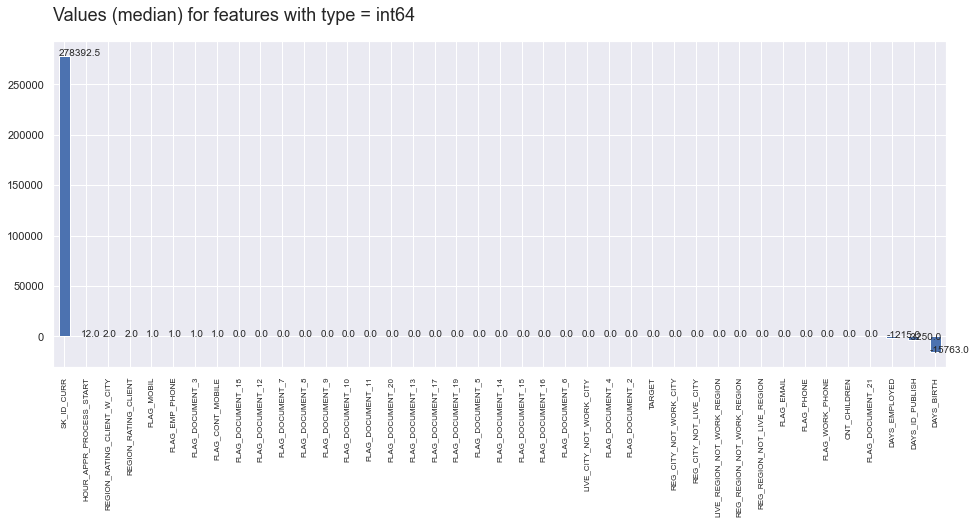

In [13]:
plt.figure(figsize=(16,6))
plot_data = df_train.select_dtypes(include='int64').median().sort_values(ascending=False)
plot_data.plot(kind='bar')
plt.title('Values (median) for features with type = int64', loc='left', size=18, pad=20)
# get xticks to write values on top of each bar
xlocs, xlabs = plt.xticks()
for i, v in enumerate(plot_data.round(1)):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v), size=10)
plt.xticks(xlocs, xlabs, size=8);
print(f'Numeric discrete variables: {df_train.select_dtypes(include="int64").shape[1]}')

Visualizing categorical variables (`object`)

In [14]:
df_train.select_dtypes(include='object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,F,N,N,Unaccompanied,Working,Incomplete higher,Single / not married,House / apartment,Core staff,FRIDAY,Trade: type 2,reg oper account,block of flats,Block,No
1,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,High skill tech staff,MONDAY,Business Entity Type 3,reg oper account,block of flats,Block,No
2,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Managers,THURSDAY,Business Entity Type 1,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,TUESDAY,XNA,NaN,NaN,NaN,No
4,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,Laborers,FRIDAY,Transport: type 4,reg oper account,block of flats,Panel,No


Unique values per feature.

In [15]:
df_train.select_dtypes(include='object').nunique().sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
CODE_GENDER                    3
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
dtype: int64

In [16]:
for column in df_train.select_dtypes(include='object').drop('ORGANIZATION_TYPE', axis=1).nunique().sort_values(ascending=False).index:
	print(f'{CYAN}{column}: {WHITE}{df_train[column].unique()}')

OCCUPATION_TYPE: ['Core staff' 'High skill tech staff' 'Managers' nan 'Laborers' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Accountants'
 'Low-skill Laborers' 'Security staff' 'Realty agents'
 'Private service staff' 'Medicine staff' 'Secretaries' 'HR staff'
 'Waiters/barmen staff' 'IT staff']
NAME_INCOME_TYPE: ['Working' 'Commercial associate' 'Pensioner' 'State servant'
 'Businessman' 'Unemployed' 'Student' 'Maternity leave']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Other_B' 'Children' 'Other_A'
 nan 'Group of people']
WEEKDAY_APPR_PROCESS_START: ['FRIDAY' 'MONDAY' 'THURSDAY' 'TUESDAY' 'SATURDAY' 'WEDNESDAY' 'SUNDAY']
WALLSMATERIAL_MODE: ['Block' nan 'Panel' 'Stone, brick' 'Monolithic' 'Others' 'Wooden' 'Mixed']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Separated' 'Widow' 'Civil marriage'
 'Unknown']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
N

Some categorical features have a huge number of values, they need to be properly converted before starts modeling.

### <span id='encoding' style='color:#1696d2'>Encoding categorical variables

There are 2 options for encoding variables:   
1. **One Hot Encoder**: for unordered data.  
Create a new column for each unique value, with 0 or 1 indicating its correspondence.  
  
2. **Ordinal Encoder**: for ordered data.  
Each unique value of the category will be converted into an integer according to its importance, i.e. higher the value, higher the weight of that observation.  
  

*Discussion*: some observations seem to make sense to be ordered, like `NAME_EDUCATION_TYPE` or `OCCUPATION_TYPE`, but we can't make the affimation that based on the values of these categories a person will be more likely to pay off their debt, i.e. `TARGET`=1.  
Making this assumption can introduce bias in our analysis, so all categorical variables will be treated as *unordered data*.  

*One Hot Encoding* can be either made with `pd.get_dummies()` function or `sklearn` `OneHotEncoder` transformer.  
  
We will use `OneHotEndocer` transformer later in the pipeline, but for now we can make a copy of the dataset with `pd.get_dummies()` to finish our exploratory data analysis, and see if there is an impact on the correlations.  

In [17]:
# make a copy of the dataframe
df_train_copy = df_train.copy()
# apply onehot encoding with get_dummies
dummies = pd.get_dummies(df_train_copy.select_dtypes(include='object'))
# drop original categorical features
df_train_copy.drop(df_train_copy.select_dtypes(include='object').columns, axis=1, inplace=True)
# join dataframes
df_train_onehot = pd.concat([df_train_copy, dummies], axis=1)
print(f'Transformed data frame has {df_train_onehot.shape[1] - df_train.shape[1]} new columns, total = {df_train_onehot.shape[1]}')
df_train_onehot.head()

Transformed data frame has 124 new columns, total = 246


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,456162,0,0,112500.000,700830.000,22738.500,585000.000,0.020,-8676,-813,-4163.000,-1363,NaN,1,1,1,1,0,0,1.000,2,2,17,0,0,0,1,1,0,NaN,0.699,0.171,0.062,0.030,0.976,0.674,0.005,0.000,0.103,0.167,0.042,0.000,0.050,0.051,0.000,0.000,0.063,0.031,0.976,0.686,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
1,134978,0,0,90000.000,375322.500,14422.500,324000.000,0.025,-13583,-223,-3554.000,-3287,NaN,1,1,0,1,0,0,2.000,2,2,11,0,0,0,0,0,0,0.541,0.200,0.769,0.023,0.057,0.981,0.735,0.016,0.000,0.103,0.042,0.083,0.013,0.018,0.018,0.000,0.000,0.023,0.059,0.981,0.745,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,318952,0,0,180000.000,544491.000,16047.000,454500.000,0.036,-13993,-6202,-7971.000,-4175,9.000,1,1,1,1,0,0,2.000,2,2,15,0,0,0,0,0,0,NaN,0.705,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,361264,0,0,270000.000,814041.000,28971.000,679500.000,0.046,-22425,365243,-11805.000,-1732,NaN,1,0,0,1,1,0,2.000,1,1,9,0,0,0,0,0,0,NaN,0.725,0.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,260639,0,0,144000.000,675000.000,21906.000,675000.000,0.026,-18839,-2763,-5069.000,-2381,NaN,1,1,0,1,1,0,1.000,2,2,16,0,0,0,0,0,0,0.592,0.706,0.331,0.191,0.180,0.989,0.850,0.034,0.000,0.448,0.167,0.208,0.275,0.155,0.206,0.000,0.000,0.194,0.187,0.989,0.856,..

### <span id='corr' style='color:#1696d2'>Data correlation

In [18]:
# get correlation from dataframe
df_corr = df_train.corr()
# set the upper triangle of the dataframe to zero for a cleaner display
half_df_corr = pd.DataFrame(np.triu(df_corr)!=0, columns=df_corr.columns, index=df_corr.index)
df_corr[half_df_corr] = 0
# plot heatmap
fig = px.imshow(df_corr, color_continuous_scale='RdBu_r', origin='lower')
fig.update_layout(
	title='Correlation Heatmap',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(l=50, r=50, b=50, t=100, pad=4)
)
fig.show()

### <span id='target_dist' style='color:#1696d2'>Target distribuition

#### Check if `TARGET` distribution is balanced

In [19]:
# create a temporary data frame with TARGET value counts
_df = df_train['TARGET'].value_counts(dropna=False).rename_axis('TARGET').reset_index(name='counts').astype('object')
# plot figure
fig = px.bar(data_frame=_df, x='TARGET', y='counts', color='TARGET', width=600, title='Target Distribuition',
			color_discrete_map={
				0: 'rgba(22, 150, 210, 0.9)',
				1: 'rgba(92, 88, 89, 0.9)'
			})
fig.show()

`TARGET` variable is very unbalanced, for this will be important to **stratify** our data during the construction of the model.  

#### Analyze top correlations with `TARGET`

In [20]:
print('Five most negative correlation with TARGET:')
display(df_train.corr()['TARGET'].sort_values()[:5]) # exclude target, since corr = 1
print('Five most positive correlation with TARGET:')
display(df_train.corr()['TARGET'].sort_values(ascending=False)[1:6])

Five most negative correlation with TARGET:


EXT_SOURCE_3    -0.179
EXT_SOURCE_2    -0.161
EXT_SOURCE_1    -0.159
DAYS_EMPLOYED   -0.045
FLOORSMAX_AVG   -0.044
Name: TARGET, dtype: float64

Five most positive correlation with TARGET:


DAYS_BIRTH                    0.079
REGION_RATING_CLIENT_W_CITY   0.062
REGION_RATING_CLIENT          0.059
DAYS_LAST_PHONE_CHANGE        0.054
DAYS_ID_PUBLISH               0.052
Name: TARGET, dtype: float64

#### Same analysis for the Data Frame with One Hot Encoding

In [21]:
print('Five most negative correlation with TARGET:')
display(df_train_onehot.corr()['TARGET'].sort_values()[:5])
print('Five most positive correlation with TARGET:')
display(df_train_onehot.corr()['TARGET'].sort_values(ascending=False)[1:6])

Five most negative correlation with TARGET:


EXT_SOURCE_3                           -0.179
EXT_SOURCE_2                           -0.161
EXT_SOURCE_1                           -0.159
NAME_EDUCATION_TYPE_Higher education   -0.057
CODE_GENDER_F                          -0.055
Name: TARGET, dtype: float64

Five most positive correlation with TARGET:


DAYS_BIRTH                    0.079
REGION_RATING_CLIENT_W_CITY   0.062
REGION_RATING_CLIENT          0.059
NAME_INCOME_TYPE_Working      0.056
CODE_GENDER_M                 0.055
Name: TARGET, dtype: float64

For `GENDER` values, we have `F` indicating a negative correlation and `M` indicating a positive correlation. This is a sensitive information, because we can risk to create a model that will have a bias towards a gender. When the model is complete, we need to rank the importance of the features and analyse if the algorithm have indeed introduced this bias.  

Features like `EXT_SOURCE_n` have a weak negative correlation, let's see the description:

In [22]:
df_description.query('Row.str.contains("EXT_SOURCE")', engine='python')

,Table,Row,Description,Special
41,application_{train|test}.csv,EXT_SOURCE_1,Normalized score from external data source,normalized
42,application_{train|test}.csv,EXT_SOURCE_2,Normalized score from external data source,normalized
43,application_{train|test}.csv,EXT_SOURCE_3,Normalized score from external data source,normalized


`TARGET` distribuition with each `EXT_SOURCE` features

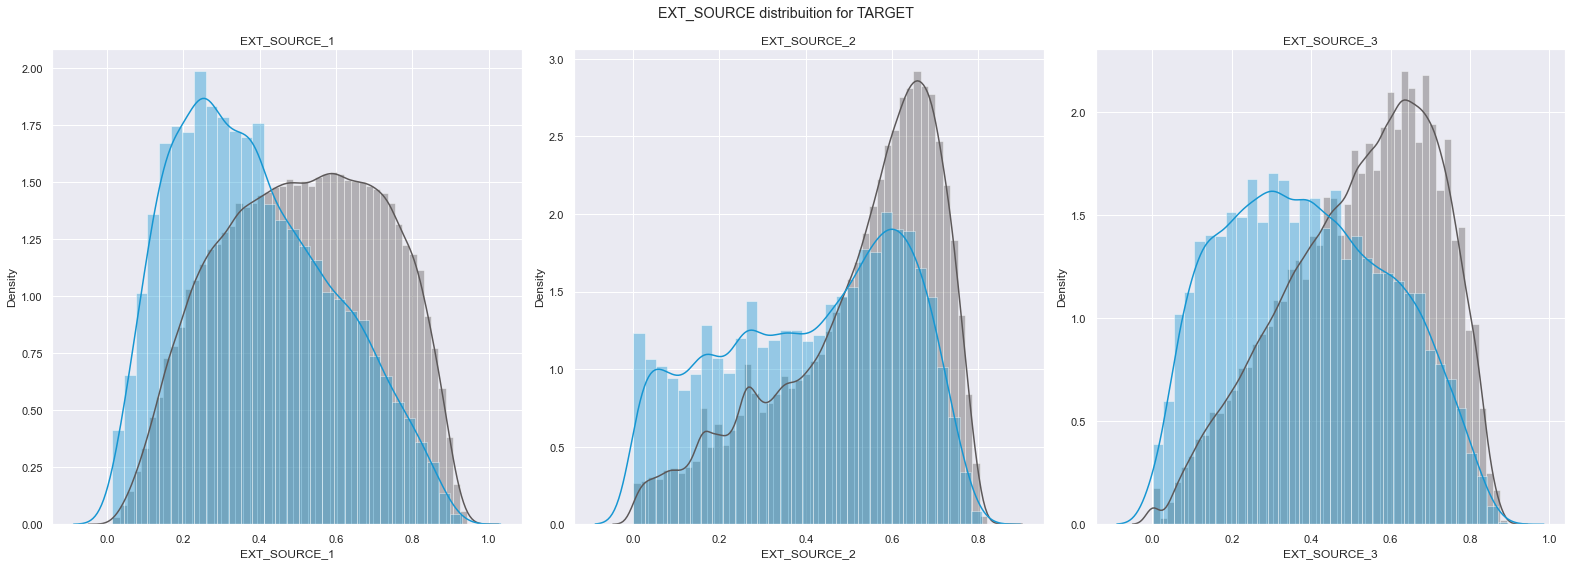

In [23]:
fig, ax = plt.subplots(1,3,figsize=(22,8))
for index, feature in enumerate(['EXT_SOURCE_' + str(i) for i in range(1,4)]):
	sns.distplot(df_train.query('TARGET == 0')[feature], kde=True, color=colors['gray'], ax=ax[index])
	sns.distplot(df_train.query('TARGET == 1')[feature], kde=True, color=colors['cyan'], ax=ax[index])
	ax[index].set_title(feature)
plt.suptitle('EXT_SOURCE distribuition for TARGET')
plt.tight_layout();

### <span id='outliers' style='color:#1696d2'>Search for Outliers

##

## <span id='baseline' style='color:Gold'>3. First Cycle - Baseline Model

For the baseline model, we will create a pipeline with the following steps:  
- Split data into train/test;  
- Deal NA values with `sklearn SimpleImputer`, with `strategy=mean` for numeric features and  `strategy=constant` with `'unknow'` value for categorical features;  
- Scale data using `StandartScaler`;  
- Use `LogisticRegression` as the baseline estimator.  

#### Split data into train/test and stratify with Target

In [6]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

#### Set pipeline for *numeric features*

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [8]:
numeric_features_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy='mean')),
    ('std', MinMaxScaler())
])

numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()

#### Set pipeline for *categorical features*

In [9]:
categorical_features_pipeline = Pipeline([
    ('impute_cat', SimpleImputer(strategy='constant', fill_value='unknow')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

#### Create a pre-processing pipeline for `ColumnTransformer`

In [10]:
from sklearn.compose import ColumnTransformer

pre_processing_pipeline = ColumnTransformer([
    ('numeric_transformer', numeric_features_pipeline, numeric_features),
    ('categorical_transformer', categorical_features_pipeline ,categorical_features)
])

#### Create `Pipeline` and fit model

In [11]:
from sklearn.linear_model import LogisticRegression

# create final pipeline
baseline_pipeline = Pipeline([
    ('pre_processing', pre_processing_pipeline),
    ('lr', LogisticRegression(random_state=42))
])
# fit to model
baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   MinMaxScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTR

#### Predict values from train and test dataset

In [12]:
y_pred_train = baseline_pipeline.predict(X_train)
y_pred_test = baseline_pipeline.predict(X_test)
y_proba_train = baseline_pipeline.predict_proba(X_train)
y_proba_test = baseline_pipeline.predict_proba(X_test)

#### Evaluate baseline model metrics with `roc_auc_score`

ROC AUC Score for Train dataset: 0.7464670080661555
ROC AUC Score for Test dataset: 0.7445526644683004

Train data Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    180830
           1       0.49      0.01      0.02     15976

    accuracy                           0.92    196806
   macro avg       0.70      0.51      0.49    196806
weighted avg       0.88      0.92      0.88    196806

Test data Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.43      0.01      0.02      3994

    accuracy                           0.92     49202
   macro avg       0.68      0.50      0.49     49202
weighted avg       0.88      0.92      0.88     49202



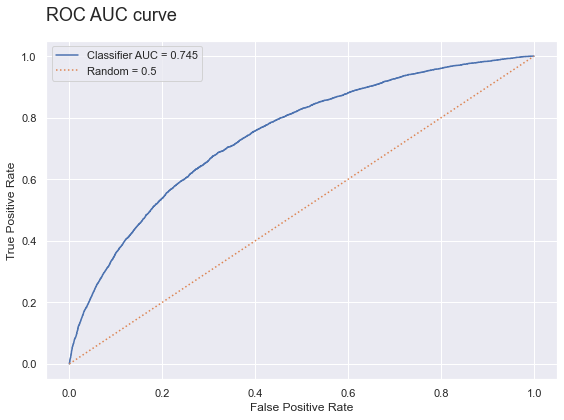

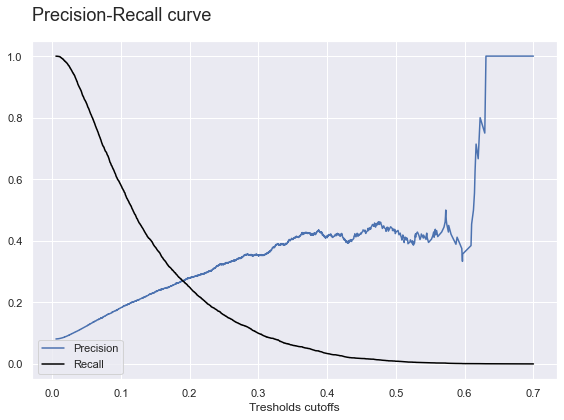

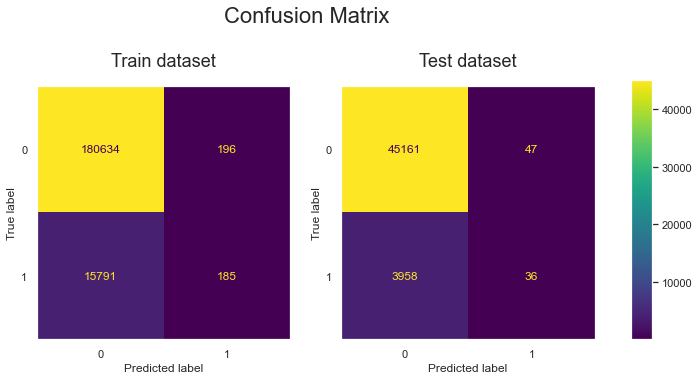

In [13]:
display_classification_metrics(baseline_pipeline, X_train, X_test, y_train, y_test)

The baseline model hit a score of **0.745**.  
  
For the next cycle, we will apply hyperparameter tunning and use different estimators, like `RandomForest` and `GradientBoosting`

#### Saving model

In [14]:
# saving baseline_pipeline
with open('pickle_data/baseline_model.pickle', 'wb') as file:
    pickle.dump(baseline_pipeline, file, protocol=pickle.HIGHEST_PROTOCOL)

## <span id='cycle2' style='color:Gold'>4. Second Cycle - Improving Model with Hyper-parameter tunning

For the hyperparameter tunning, `StratifiedKFold` will be used as the cross-validation method, `RandomizedSearchCV` to search for possible best hyperparameters, and finally `GridSearchCV` to fine tune.  

### <span id='lr+' style='color:#1696d2'>Improving Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score


cross_val_score(Pipeline([
						('pre_processing', pre_processing_pipeline),
						('lr', LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', random_state=42))
					]),
				X, y, cv=5, scoring='roc_auc').mean()

#### Broad search for hyper-parameter with `RandomizedSearchCV`

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# baseline pipeline
baseline_pipeline = Pipeline([
    ('pre_processing', pre_processing_pipeline),
    ('lr', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5, random_state=42))
])

# hyperparameters candidates for LogisticRegression
params_dist_lr = {
                'lr__C' : np.linspace(0,5,500),
                'lr__l1_ratio' : uniform(loc=0, scale=1)
                } 

# instance of the cross-validation method
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# instance of RandomizedSearchCV
random_lr = RandomizedSearchCV(estimator=baseline_pipeline,
                              param_distributions=params_dist_lr,
                              n_iter=10,
                              scoring='roc_auc',
                              cv=splitter,
                              verbose=10,
                              random_state=42)

# search for best hyperparameters
random_lr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328..
[CV 1/5; 1/10] END lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328;, score=0.801 total time=   0.2s
[CV 2/5; 1/10] START lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328..
[CV 2/5; 1/10] END lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328;, score=0.784 total time=   0.3s
[CV 3/5; 1/10] START lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328..
[CV 3/5; 1/10] END lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328;, score=0.696 total time=   0.2s
[CV 4/5; 1/10] START lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328..
[CV 4/5; 1/10] END lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328;, score=0.751 total time=   0.3s
[CV 5/5; 1/10] START lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328..
[CV 5/5; 1/10] END lr__C=1.0220440881763526, lr__l1_ratio=0.7965429868602328;, score=0.720 tot

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pre_processing',
                                              ColumnTransformer(transformers=[('numeric_transformer',
                                                                               Pipeline(steps=[('impute_num',
                                                                                                SimpleImputer()),
                                                                                               ('std',
                                                                                                MinMaxScaler())]),
                                                                               ['CNT_CHILDREN',
                                                                                'AMT_INCOME_TOTAL',
                                                                                'AMT_CREDIT',
                    

Best parameters for `LogisticRegression` using `RandomizedSearchCV`

In [ ]:
random_lr.best_params_

{'lr__C': 1.0220440881763526, 'lr__l1_ratio': 0.7965429868602328}

Best score for `LogisticRegression` using `RandomizedSearchCV`

In [ ]:
random_lr.best_score_

0.7504336051105611

In [ ]:
# remove prefix from the dictionary keys
random_lr_best_params = random_lr.best_params_.copy()
for key in random_lr.best_params_.keys():
	random_lr_best_params[key.split('__')[-1]] = random_lr_best_params.pop(key)
# create new pipeline with best parameters
best_random_lr = Pipeline([
    ('pre_processing', pre_processing_pipeline),
    ('lr', LogisticRegression(**random_lr_best_params, penalty='elasticnet', solver='saga', random_state=42))
]).fit(X_train, y_train)

print(f'ROC AUC Score with RandomizedSearchCV best params: {roc_auc_score(y_test, best_random_lr.predict_proba(X_test)[:,1]):.3f}')

ROC AUC Score with RandomizedSearchCV best params: 0.732


In [ ]:
pd.DataFrame(random_lr.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.228,0.017,0.031,0.009,1.022,0.797,"{'lr__C': 1.0220440881763526, 'lr__l1_ratio': ...",0.801,0.784,0.696,0.751,0.720,0.750,0.039,1
6,0.221,0.006,0.037,0.007,1.513,0.651,"{'lr__C': 1.5130260521042083, 'lr__l1_ratio': ...",0.798,0.781,0.695,0.750,0.717,0.748,0.038,2
2,0.214,0.005,0.028,0.007,1.884,0.597,"{'lr__C': 1.8837675350701402, 'lr__l1_ratio': ...",0.797,0.780,0.695,0.750,0.716,0.748,0.038,3
7,0.214,0.004,0.038,0.007,3.086,0.970,"{'lr__C': 3.0861723446893787, 'lr__l1_ratio': ...",0.796,0.780,0.695,0.750,0.716,0.748,0.038,4
1,0.233,0.017,0.035,0.017,2.705,0.732,"{'lr__C': 2.7054108216432864, 'lr__l1_ratio': ...",0.796,0.779,0.695,0.750,0.716,0.747,0.038,5
8,0.233,0.030,0.026,0.004,4.920,0.939,"{'lr__C': 4.919839679358717, 'lr__l1_ratio': 0...",0.795,0.779,0.695,0.750,0.715,0.747,0.038,6
5,0.262,0.022,0.030,0.006,3.727,0.601,"{'lr__C': 3.727454909819639, 'lr__l1_ratio': 0...",0.795,0.778,0.695,0.750,0.715,0.746,0.037,7
3,0.260,0.033,0.034,0.018,1.212,0.156,"{'lr__C': 1.2124248496993988, 'lr__l1_ratio': ...",0.795,0.778,0.694,0.750,0.715,0.746,0.038,8
4,0.270,0.018,0.027,0.007,3.307,0.459,"{'lr__C': 3.306613226452906, 'lr__l1_ratio': 0...",0.794,0.778,0.695,0.750,0.714,0.746,0.037,9
9,0.226,0.012,0.031,0.005,3.858,0.182,"{'lr__C': 3.8577154308617234, 'lr__l1_ratio': ...",0.793,0.777,0.695,0.750,0.713,0.746,0.037,10


#### Fine tunning with `GridSearchCV`

In [ ]:
from sklearn.model_selection import GridSearchCV

# baseline pipeline
baseline_pipeline = Pipeline([
    ('pre_processing', pre_processing_pipeline),
    ('lr', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, random_state=42))
])

# hyperparameters candidates for LogisticRegression
params_grid_lr = {
                'lr__C' : np.linspace(0.6,1.5,10),
                'lr__l1_ratio' : np.linspace(0.6,0.9,10)
                } 

# instance of the cross-validation method
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# instance of RandomizedSearchCV
grid_lr = GridSearchCV(estimator=baseline_pipeline,
                        param_grid=params_grid_lr,
                        scoring='roc_auc',
                        cv=splitter,
                        verbose=10)

# search for best hyperparameters
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START lr__C=0.6, lr__l1_ratio=0.6...............................
[CV 1/5; 1/100] END lr__C=0.6, lr__l1_ratio=0.6;, score=0.805 total time=   2.9s
[CV 2/5; 1/100] START lr__C=0.6, lr__l1_ratio=0.6...............................
[CV 2/5; 1/100] END lr__C=0.6, lr__l1_ratio=0.6;, score=0.789 total time=   2.8s
[CV 3/5; 1/100] START lr__C=0.6, lr__l1_ratio=0.6...............................
[CV 3/5; 1/100] END lr__C=0.6, lr__l1_ratio=0.6;, score=0.706 total time=   5.2s
[CV 4/5; 1/100] START lr__C=0.6, lr__l1_ratio=0.6...............................
[CV 4/5; 1/100] END lr__C=0.6, lr__l1_ratio=0.6;, score=0.751 total time=   4.7s
[CV 5/5; 1/100] START lr__C=0.6, lr__l1_ratio=0.6...............................
[CV 5/5; 1/100] END lr__C=0.6, lr__l1_ratio=0.6;, score=0.724 total time=   4.3s
[CV 1/5; 2/100] START lr__C=0.6, lr__l1_ratio=0.6333333333333333................
[CV 1/5; 2/100] END lr__C=0.6, lr__l1_ratio=0.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('numeric_transformer',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          MinMaxScaler())]),
                                                                         ['CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_A

Best parameters for `LogisticRegression` using `GridSearchCV`

In [ ]:
grid_lr.best_params_

{'lr__C': 0.6, 'lr__l1_ratio': 0.9}

Best score for `LogisticRegression` using `GridSearchCV`

In [ ]:
grid_lr.best_score_

0.7570140389808354

In [ ]:
# remove prefix from the dictionary keys
grid_lr_best_params = grid_lr.best_params_.copy()
for key in grid_lr.best_params_.keys():
	grid_lr_best_params[key.split('__')[-1]] = grid_lr_best_params.pop(key)

best_grid_lr = Pipeline([
    ('pre_processing', pre_processing_pipeline),
    ('lr', LogisticRegression(**grid_lr_best_params, penalty='elasticnet', solver='saga', random_state=42))
]).fit(X_train, y_train)

print(f'ROC AUC Score with RandomizedSearchCV best params: {roc_auc_score(y_test, best_grid_lr.predict_proba(X_test)[:,1]):.3f}')

ROC AUC Score with RandomizedSearchCV best params: 0.732


#### Optmized search with `hyperopt`

Another method to find better hyper-parameters is performing search with [`hyperopt`](#http://hyperopt.github.io/hyperopt/) library.  
This algorithm uses bayesian optimization to improve the results.  

In [ ]:
# hyperopt imports
from hyperopt import Trials, hp, tpe, fmin, space_eval
# cross validate method to be used with hyperopt
from sklearn.model_selection import cross_validate

Steps:  
- Create our **hps_space**, a dictionary with every hyper-parameter and possible range of values  
- Define our objective function, it will contain our *pipeline*, *cross-validation transformer* and returns a *score*  
- Run the function with `fmin()`  
- Evaluate results with `space_eval()`  

In [ ]:
# define the parameters space
# same parameter as RandomSearchCV for comparision
hps_space = {
            'C' :           hp.choice('C', np.linspace(0,5,500)),
            'l1_ratio' :    hp.choice('l1_ratio', np.linspace(0,1,50))
            }

# create the objective function
def objective_function(hps_space):
    # pipeline with the pre-processing steps and the estimator to be used
    pipeline =  Pipeline([('pp', pre_processing_pipeline),
                        ('lr', LogisticRegression(**hps_space, # assign space like a kwargs variable
                                                    penalty='elasticnet', solver='saga', max_iter=1000, random_state=42))]
                ) 
    #   splitter to be used in the cross validation step
    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    # make cross validation 
    results = cross_validate(pipeline,
                             X_train, y_train, 
                             cv=splitter,
                             scoring='roc_auc',
                             n_jobs=-1)
    # return the mean from cross validation results
    return -results['test_score'].mean() #  -1 ?

# perform hyperparameter tunning
lr_hps_search = fmin(fn=objective_function,
                    space=hps_space,
                    algo=tpe.suggest,
                    trials=Trials(),
                    rstate=np.random.default_rng(42),
                    max_evals=10)

100%|██████████| 10/10 [03:51<00:00, 23.14s/trial, best loss: -0.7548959996024304]


In [ ]:
# get results
lr_hps_best_params = space_eval(hps_space, lr_hps_search)
print(f'LogisticRegression best parameters: {lr_hps_best_params}')

# create pipeline with the best parameters
lr_model = Pipeline([('pp', pre_processing_pipeline),
                    ('lr', LogisticRegression(**lr_hps_best_params, penalty='elasticnet', solver='saga', random_state=42))]
            ).fit(X_train, y_train)

# print score
lr_hps_score = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
print(f'ROC AUC score for LogisticRegression: {lr_hps_score:.3f}')

LogisticRegression best parameters: {'C': 0.32064128256513025, 'l1_ratio': 0.4693877551020408}
ROC AUC score for LogisticRegression: 0.729


#### Saving model

In [ ]:
print('ROC AUC Score for LogisticRegression')
print(f'RandomizedSearchCV: {roc_auc_score(y_test, best_random_lr.predict_proba(X_test)[:,1]):.3f}')
print(f'GridSearchCV: {roc_auc_score(y_test, best_grid_lr.predict_proba(X_test)[:,1]):.3f}')
print(f'Hyperopt: {lr_hps_score:.3f}')

ROC AUC Score for LogisticRegression
RandomizedSearchCV: 0.732
GridSearchCV: 0.732
Hyperopt: 0.729


In [ ]:
# saving the best pipeline
with open('pickle_data/2C_lr_grid.pickle', 'wb') as file:
    pickle.dump(grid_lr, file, protocol=pickle.HIGHEST_PROTOCOL)

## <span id='cycle3' style='color:Gold'>5. Third Cycle - Using other estimators

For all the following estimators, the first search will be with `hyperpot`, and later fine tuned with `GridSearchCV`

### <span id='rf' style='color:#1696d2'>Random Forest

The `RandomForestClassifier` estimator is more powerfull than `Logistic Regression`, for using the concept of *Bagging*(Bootsrap Aggregating) to generate random independent trees and make the final prediction throught the average of each individual prediction.  
  
This approach tends to remove some erros and outliers, making a model more generic an stable to overfitting.  
The most important parameters are:  
- `n_estimators`: how many trees will be build. More trees will take a longer time to finish, and starts to loses its individual properties.  
- `max_features`: number of features in the random sample to be used in each split. Less imply to reduce overfitting, but can lead to underfitting.  


In [ ]:
from sklearn.ensemble import RandomForestClassifier

hps_space = {'criterion' : hp.choice('criterion', ['gini', 'entropy']),
             'n_estimators' : hp.choice('n_estimators', range(1, 501)),
             'max_depth' : hp.choice('max_depth', [1, 2])} # must be a low number, since the algorithm uses a 'weak learner'

def objective_function(hps_space):
    pipeline = Pipeline([('pp', pre_processing_pipeline),
                        ('rf', RandomForestClassifier(**hps_space, random_state=42))]) 
    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    results = cross_validate(pipeline, X_train, y_train, cv=splitter, scoring='roc_auc', n_jobs=-1)
    return results['test_score'].mean()

rf_hps_search = fmin(fn=objective_function, space=hps_space, algo=tpe.suggest, trials=Trials(), rstate=np.random.default_rng(42),
                    max_evals=10)

Extrating the results with `space_eval`, fitting model and calculating the **ROC AUC score**

In [ ]:
# using space_eval to extract the results
rf_hps_best_params = space_eval(hps_space, rf_hps_search)
print(f'RandomForest best parameters: {rf_hps_best_params}')

# fit new model with the best parameters
rf_model = Pipeline([("pp", pre_processing_pipeline),
        ("rf", RandomForestClassifier(**rf_hps_best_params))]
).fit(X_train, y_train)

# validate metrics
rf_hps_score = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(f'ROC AUC score for Random Forest: {rf_hps_score:.3f}')

#### Saving model

In [ ]:
# saving rf model
with open('pickle_data/2C_rf_model.pickle', 'wb') as file:
    pickle.dump(rf_model, file, protocol=pickle.HIGHEST_PROTOCOL)

### <span id='gb' style='color:#1696d2'>Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
hps_space = {'loss' : hp.choice('loss', ['deviance', 'exponential']),
             'n_estimators' : hp.choice('n_estimators', range(1, 501)),
             'max_depth' : hp.choice('max_depth', [1, 2])}

def objective_function(hps_space):
    pipeline = Pipeline([('pp', pre_processing_pipeline),
                        ('gb', GradientBoostingClassifier(**hps_space, random_state=42))]) 
    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    results = cross_validate(pipeline, X_train, y_train, cv=splitter, scoring='roc_auc', n_jobs=-1)
    return results['test_score'].mean()

gb_hps_search = fmin(fn=objective_function,
                    space=hps_space,
                    algo=tpe.suggest,
                    trials=Trials(),
                    rstate=np.random.default_rng(42),
                    max_evals=10)

In [ ]:
gb_hps_best_params = space_eval(hps_space, gb_hps_search)
print(f'Gradient Boosting best parameters: {gb_hps_best_params}')

gb_model = Pipeline([('pp', pre_processing_pipeline),
        ('gb', GradientBoostingClassifier(**gb_hps_best_params))]
).fit(X_train, y_train)

gb_hps_score = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])
print(f'ROC AUC score for Gradient Boosting: {gb_hps_score:.3f}')

#### Saving model

In [ ]:
# saving gb model
with open('pickle_data/2C_gb_model.pickle', 'wb') as file:
    pickle.dump(gb_model, file, protocol=pickle.HIGHEST_PROTOCOL)

### <span id='svm' style='color:#1696d2'>Support Vector Machine

In [ ]:
from sklearn.svm import SVC

hps_space = {
                'C' :       hp.choice('C', np.logspace(-2, 2, 100)),
                'kernel' :  hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']),
                'degree' :  hp.choice('degree', range(3,6)),
                'gamma'  :  hp.choice('gamma', np.logspace(-2, 2, 100))
            }

def objective_function(hps_space):
    pipeline = Pipeline([('pp', pre_processing_pipeline),
                        ('svc', SVC(**hps_space, random_state=42))]) 
    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    results = cross_validate(pipeline, X_train, y_train, cv=splitter, scoring='roc_auc', n_jobs=-1)
    return results['test_score'].mean()

svc_hps_search = fmin(fn=objective_function,
                    space=hps_space,
                    algo=tpe.suggest,
                    trials=Trials(),
                    rstate=np.random.default_rng(42),
                    max_evals=10)

In [ ]:
svc_hps_best_params = space_eval(hps_space, svc_hps_search)
print(f'SVC best parameters: {svc_hps_best_params}')

svc_model = Pipeline([("pp", pre_processing_pipeline),
                      ("gb", SVC(**svc_hps_best_params))]
).fit(X_train, y_train)

svc_hps_score = roc_auc_score(y_test, svc_model.predict_proba(X_test)[:,1])
print(f'ROC AUC score for SVC: {svc_hps_score:.3f}')

In [ ]:
# saving svc model
with open('pickle_data/2C_svc_model.pickle', 'wb') as file:
    pickle.dump(svc_model, file, protocol=pickle.HIGHEST_PROTOCOL)

### <span id='xgb' style='color:#1696d2'>XGBoost

In [ ]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline([("pre_processador", pre_processing_pipeline),
                     ("xgb", XGBClassifier(random_state=42))])

pipe_xgb.fit(X_train, y_train)

xgb_score = roc_auc_score(y_test, pipe_xgb.predict_proba(X_test)[:,1])
print(f'ROC AUC score for XGB with default params: {xgb_score:.3f}')

In [ ]:
# saving svc model
with open('pickle_data/2C_default_xgb_model.pickle', 'wb') as file:
    pickle.dump(pipe_xgb, file, protocol=pickle.HIGHEST_PROTOCOL)

### <span id='xgb+' style='color:#1696d2'>XGBoost (with Bayesian Optimization)

This model was trained in the file `model_training.ipynb`

In [21]:
with open('pickle_data/first_cycle/XGBClassifier_100_pct.pickle', 'rb') as file:
	xgb_model = pickle.load(file)

xgb_model

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   MinMaxScaler())]),
                                                  ['CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
    

## <span id='saving' style='color:Gold'>6. Interpreting Models

### Loading models with Pickle

In [66]:
models = {}

# baseline
baseline_model = baseline_pipeline
models['Baseline'] = baseline_model
#with open('pickle_data/first_cycle/baseline_model.pickle', 'rb') as file:
#	baseline_model = pickle.load(file)
# logistic regression
with open('pickle_data/second_cycle/2C_lr_grid.pickle', 'rb') as file:
	lr_model = pickle.load(file)
	models['Logistic Regression'] = lr_model
# random forest
with open('pickle_data/second_cycle/2C_rf_model.pickle', 'rb') as file:
	rf_model = pickle.load(file)
	models['Random Forest'] = rf_model
# grandient boosting
with open('pickle_data/second_cycle/2C_gb_model.pickle', 'rb') as file:
	gb_model = pickle.load(file)
	models['Gradient Boosting'] = gb_model
# SVC
with open('pickle_data/second_cycle/2C_svc_model.pickle', 'rb') as file:
	svc_model = pickle.load(file)
	models['SVC'] = svc_model
# xgboost (default)
with open('pickle_data/second_cycle/2C_default_xgb_model.pickle', 'rb') as file:
	default_xgb_model = pickle.load(file)
	models['Default XGBoost'] = default_xgb_model
# xgboost (optmized)
with open('pickle_data/first_cycle/XGBClassifier_100_pct.pickle', 'rb') as file:
	xgb_model = pickle.load(file)
	models['Optmized XGBoost'] = xgb_model

### ROC AUC curve for all models

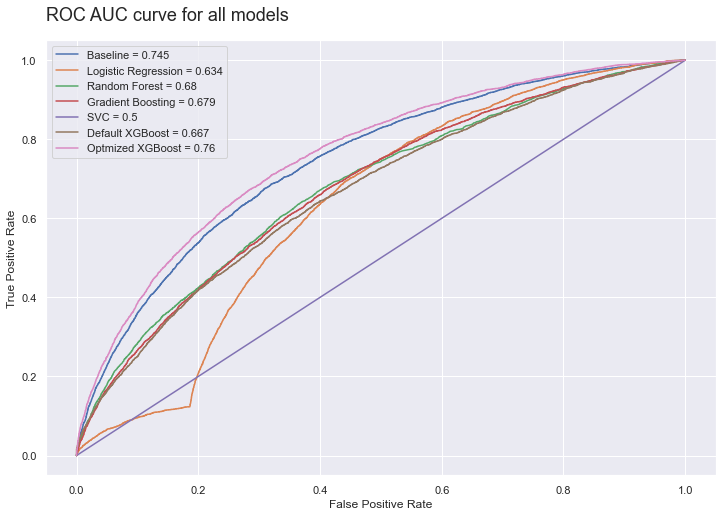

In [67]:
def plot_roc_auc_curve(name, estimator, X_test, y_test):

	y_proba_test = estimator.predict_proba(X_test)[:,1]
	# get false positive rates and true positive rates
	fpr, tpr, _ = roc_curve(y_test, y_proba_test)
	# score for test dataset
	score = round(roc_auc_score(y_test, y_proba_test),3)
	# plot ROC AUC curve
	plt.plot(fpr, tpr, label=f'{name} = {score}')

plt.figure(figsize=(12,8))

for name, model in models.items():
	plot_roc_auc_curve(name, model, X_test, y_test)

plt.title('ROC AUC curve for all models', fontsize=18, pad=20, loc='left')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Metrics for the best model - XGBoost

ROC AUC Score for Train dataset: 0.816730118888447
ROC AUC Score for Test dataset: 0.7597986327615649

Train data Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    180830
           1       0.74      0.03      0.07     15976

    accuracy                           0.92    196806
   macro avg       0.83      0.52      0.51    196806
weighted avg       0.91      0.92      0.89    196806

Test data Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     45208
           1       0.60      0.02      0.04      3994

    accuracy                           0.92     49202
   macro avg       0.76      0.51      0.50     49202
weighted avg       0.89      0.92      0.88     49202



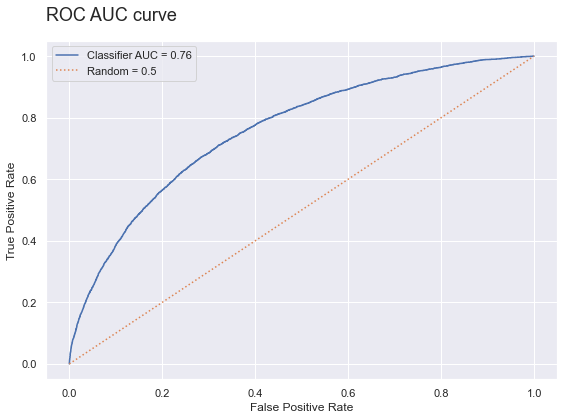

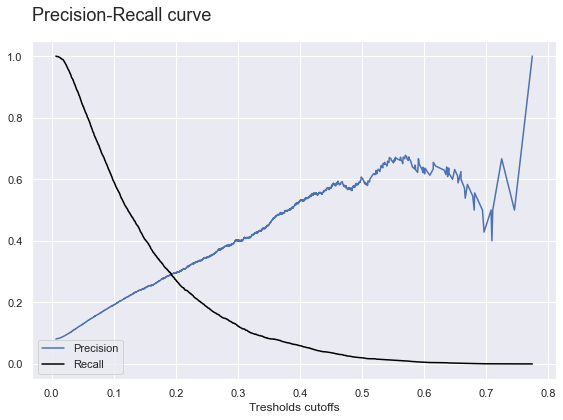

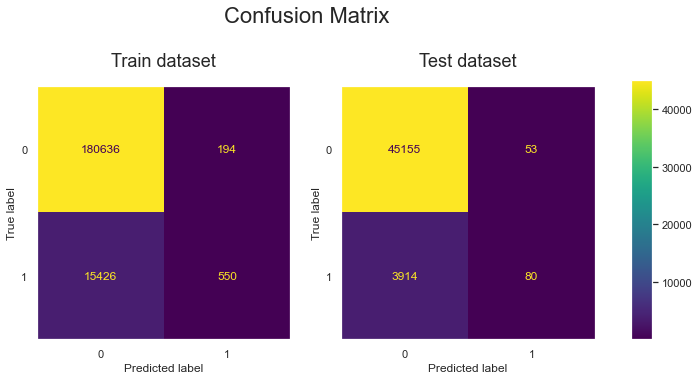

In [65]:
display_classification_metrics(xgb_model, X_train, X_test, y_train, y_test)

In [ ]:
"""explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                              mode="classification",
                                              feature_names=xgb_model.feature_names_in_,
                                              class_names=xgb_model.classes_)

explanation = explainer.explain_instance(X_test.iloc[0],
                                         xgb_model.predict_proba,
                                         num_features=xgb_model.n_features_in_)

explanation.show_in_notebook()"""

## <span id='deploy' style='color:Gold'>7. Deploy Model

## <span id='sub' style='color:Gold'>8. Submit results

In [ ]:
# create submit dataframe with predictions from the best model
pd.DataFrame({
	'SK_ID_CURR': df_test['SK_ID_CURR'],
	'TARGET_proba': xgb_model.predict_proba(df_test.drop('SK_ID_CURR', axis=1))[:,1]
	}).to_csv('submit_file.csv')